In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from itertools import product

In [4]:
def avgnb(m):
    out = np.empty_like(m)
    nr, nc = m.shape[:2]
    
    for r, c in product(range(nr), range(nc)):
        val, n = 0.0, 0.0
        for i in range(max(0, r-1), min(nr, r+2)):
            for j in range(max(0, c-1), min(nc, c+2)):
                n += 1.0
                val += m[i, j]
        
        out[r, c] = (val - m[r, c]) / (n-1)
        
    return out

In [5]:
fontsize = 14

# Loading the data

## Nutrient data

First let's load the $s(x_i, t)$ :

In [6]:
s = np.load("substrate/computed.npy")

We can retrieve its dimensions :

In [7]:
n_plates, n_rows, n_columns, n_points = s.shape
plates, rows, columns, points = map(np.arange, s.shape)

Now let's compute the average over the neighbours $\bar s(x_i, t)$ :

In [8]:
sbar = np.empty_like(s)
for p in plates:
    sbar[p] = avgnb(s[p])

## Diffusion coefficient

Finally, we load the best fitted parameters, to retrieve $D$ :

In [9]:
params = pd.read_csv("diffusion-parameters/optimal.csv")

# Figure

We quickly compute which layer a population is part of :

In [10]:
layers = np.empty((n_rows, n_columns))
for r, c in product(rows, columns):
    layers[r, c] = min(r, c, n_rows-1 - r, n_columns-1 - c)

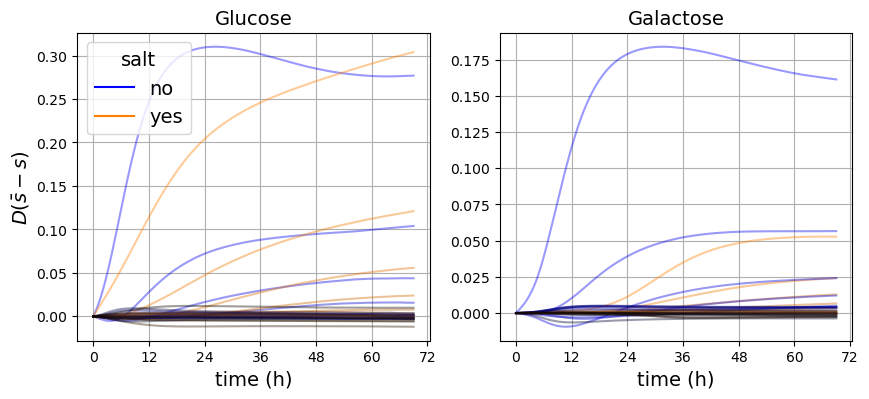

In [11]:
fig, (ax_glc, ax_gal) = plt.subplots(ncols = 2, figsize = (10, 4))

palette1 = sns.color_palette("mako", 16)
palette2 = sns.color_palette("rocket", 16)

for k in range(16):
    dsbarms = params.loc[1, "D"] * (sbar[1] - s[1])[layers == k+3]
    ax_glc.plot(dsbarms.mean(axis = 0), color = (0, 0, 1-k/16), alpha = 0.4, label = "no salt")
    dsbarms = params.loc[2, "D"] * (sbar[2] - s[2])[layers == k+3]
    ax_glc.plot(dsbarms.mean(axis = 0), color = (1-k/16, 0.5-k/32, 0), alpha = 0.4, label = "with salt")
    
    dsbarms = params.loc[3, "D"] * (sbar[3] - s[3])[layers == k+3]
    ax_gal.plot(dsbarms.mean(axis = 0), color = (0, 0, 1-k/16), alpha = 0.4)
    dsbarms = params.loc[0, "D"] * (sbar[0] - s[0])[layers == k+3]
    ax_gal.plot(dsbarms.mean(axis = 0), color = (1-k/16, 0.5-k/32, 0), alpha = 0.4)

ax_glc.set_title("Glucose", fontsize = fontsize)
ax_gal.set_title("Galactose", fontsize = fontsize)
ax_glc.set_xlabel("time (h)", fontsize = fontsize)
ax_glc.set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
ax_gal.set_xlabel("time (h)", fontsize = fontsize)
ax_gal.set_xticks([0, 36, 72, 108, 144, 180, 216], labels = [0, 12, 24, 36, 48, 60, 72])
ax_glc.set_ylabel(r"$D(\bar s - s)$", fontsize = fontsize)
ax_glc.grid()
ax_gal.grid()

l = ax_glc.legend(fontsize = fontsize, title_fontsize = fontsize)
legend = ax_glc.legend(list(l.legendHandles[:2]), ["no", "yes"], loc = "upper left", fontsize = fontsize, title_fontsize = fontsize)
legend.set_title("salt")
# for whatever reason my version of matplotlib adds alpha transparency to the legend's lines -> revert
for l in legend.legendHandles:
    l.set_alpha(1)

fig.savefig(f"plots/figure-s7/diff-term.pdf", bbox_inches = "tight")
fig.savefig(f"plots/figure-s7/diff-term.png", bbox_inches = "tight");